In [12]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from PIL import Image
import random
from sklearn.metrics import confusion_matrix


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,\
                                    GlobalAveragePooling2D, BatchNormalization\
                                    
from tensorflow.keras import utils, regularizers
from tensorflow.keras.callbacks import EarlyStopping, History
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.optimizers import Adam

# Setting a random seed
np.random.seed(42)

In [2]:
TARGETS = ['Normal', 'Cancerous']

train_dir = './cnn_train'
test_dir = './cnn_test'

In [3]:
training_data = []
def create_training_data():
    for target in TARGETS:
        path = os.path.join(train_dir, target)
        class_num = TARGETS.index(target)
        for img in os.listdir(path):
            img_array = np.array(Image.open(os.path.join(path, img)))
            training_data.append([img_array, class_num])
                            
create_training_data()

In [4]:
testing_data = []
def create_testing_data():
    for target in TARGETS:
        path = os.path.join(test_dir, target)
        class_num = TARGETS.index(target)
        for img in os.listdir(path):
            img_array = np.array(Image.open(os.path.join(path, img)))
            testing_data.append([img_array, class_num])
            
create_testing_data()

In [5]:
X_train = []
y_train = []

for features, label in training_data:
    X_train.append(features)
    y_train.append(label)
    
X_train = np.array(X_train).reshape(-1, 96, 96, 3)

In [6]:
X_test = []
y_test = []

for features, label in testing_data:
    X_test.append(features)
    y_test.append(label)
    
X_test = np.array(X_test).reshape(-1, 96, 96, 3)

In [7]:
model = Sequential()

model.add(Conv2D(
    filters = 16,
    kernel_size = (3,3),
    activation = "relu",
    input_shape = (96, 96, 3)
))

model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(
    filters = 64, 
    kernel_size = (2,2),
    activation = "relu"))

model.add(MaxPooling2D(
    pool_size = (2,2)
))

model.add(Flatten())

model.add(Dense(
    128, 
    activation = "relu",
    kernel_regularizer = regularizers.l2(0.25)
))

model.add(Dropout(0.5))

model.add(Dense(
    1, 
    activation = "sigmoid",
    kernel_regularizer = regularizers.l2(0.25)
))

es = EarlyStopping(
    monitor = "val_loss",
    min_delta = 0,
    patience = 5
)

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
history = model.fit(
        X_train,
        y_train,
        batch_size = 256,
        validation_data = (X_test, y_test),
        epochs = 10,
        callbacks = [es],
        verbose = 1,
        shuffle = True
)

Train on 176022 samples, validate on 44003 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
176022/176022 [==============================] - 733s 4ms/sample - loss: 6.1652 - acc: 0.5855 - val_loss: 0.6925 - val_acc: 0.5537
Epoch 2/10
176022/176022 [==============================] - 760s 4ms/sample - loss: 0.6800 - acc: 0.5826 - val_loss: 0.6661 - val_acc: 0.5870
Epoch 3/10
176022/176022 [==============================] - 785s 4ms/sample - loss: 0.6664 - acc: 0.6082 - val_loss: 0.6547 - val_acc: 0.6160
Epoch 4/10
176022/176022 [==============================] - 776s 4ms/sample - loss: 0.6651 - acc: 0.6140 - val_loss: 0.6608 - val_acc: 0.6294
Epoch 5/10
176022/176022 [==============================] - 773s 4ms/sample - loss: 0.6590 - acc: 0.6203 - val_loss: 0.6440 - val_acc: 0.6241
Epoch 6/10
176022/176022 [==============================] - 2923s 17ms/sample - loss: 0.6545 - acc: 0.6209 - val_loss: 0.6400 - val_acc: 0.6173
Epoch 7/10
176022/176022 [=====================

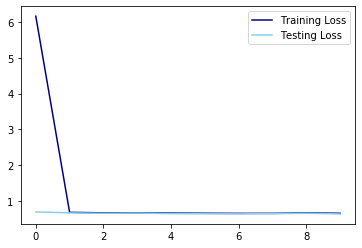

In [9]:
train_loss = history.history["loss"]
test_loss = history.history["val_loss"]

plt.plot(train_loss, label = "Training Loss", color = "navy")
plt.plot(test_loss, label = "Testing Loss", color = "skyblue")
plt.legend();

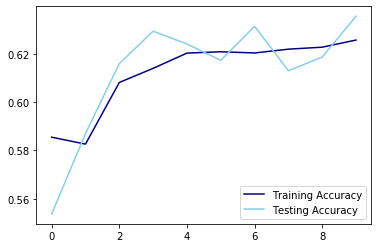

In [10]:
train_acc = history.history["acc"]
test_acc = history.history["val_acc"]

plt.plot(train_acc, label = "Training Accuracy", color = "navy")
plt.plot(test_acc, label = "Testing Accuracy", color = "skyblue")
plt.legend();

In [13]:
y_pred = model.predict_classes(X_test)

cm = confusion_matrix(y_test, y_pred)

pd.DataFrame(cm)

,0,1
0,16128,10053
1,5983,11839
